# Checkpoint 1

Reminder: 

- You are being evaluated for compeletion and effort in this checkpoint. 
- Avoid manual labor / hard coding as much as possible, everything we've taught you so far are meant to simplify and automate your process.

We will be working with the same `states_edu.csv` that you should already be familiar with from the tutorial.

We investigated Grade 8 reading score in the tutorial. For this checkpoint, you are asked to investigate another test. Here's an overview:

* Choose a specific response variable to focus on
>Grade 4 Math, Grade 4 Reading, Grade 8 Math
* Pick or create features to use
>Will all the features be useful in predicting test score? Are some more important than others? Should you standardize, bin, or scale the data?
* Explore the data as it relates to that test
>Create at least 2 visualizations (graphs), each with a caption describing the graph and what it tells us about the data
* Create training and testing data
>Do you want to train on all the data? Only data from the last 10 years? Only Michigan data?
* Train a ML model to predict outcome 
>Define what you want to predict, and pick a model in sklearn to use (see sklearn <a href="https://scikit-learn.org/stable/modules/linear_model.html">regressors</a>.
* Summarize your findings
>Write a 1 paragraph summary of what you did and make a recommendation about if and how student performance can be predicted

Include comments throughout your code! Every cleanup and preprocessing task should be documented.

Of course, if you're finding this assignment interesting (and we really hope you do!), you are welcome to do more than the requirements! For example, you may want to see if expenditure affects 4th graders more than 8th graders. Maybe you want to look into the extended version of this dataset and see how factors like sex and race are involved. You can include all your work in this notebook when you turn it in -- just always make sure you explain what you did and interpret your results. Good luck!

<h2> Data Cleanup </h2>

Import `numpy`, `pandas`, and `matplotlib`.

(Feel free to import other libraries!)

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Load in the "states_edu.csv" dataset and take a look at the head of the data

In [4]:
df = pd.read_csv('../data/states_edu.csv')
df.head()

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
0,1992_ALABAMA,ALABAMA,1992,NaN,2678885.0,304177.0,1659028.0,715680.0,2653798.0,1481703.0,...,57948.0,58025.0,41167.0,NaN,NaN,731634.0,208.0,252.0,207.0,NaN
1,1992_ALASKA,ALASKA,1992,NaN,1049591.0,106780.0,720711.0,222100.0,972488.0,498362.0,...,9748.0,8789.0,6714.0,NaN,NaN,122487.0,NaN,NaN,NaN,NaN
2,1992_ARIZONA,ARIZONA,1992,NaN,3258079.0,297888.0,1369815.0,1590376.0,3401580.0,1435908.0,...,55433.0,49081.0,37410.0,NaN,NaN,673477.0,215.0,265.0,209.0,NaN
3,1992_ARKANSAS,ARKANSAS,1992,NaN,1711959.0,178571.0,958785.0,574603.0,1743022.0,964323.0,...,34632.0,36011.0,27651.0,NaN,NaN,441490.0,210.0,256.0,211.0,NaN
4,1992_CALIFORNIA,CALIFORNIA,1992,NaN,26260025.0,2072470.0,16546514.0,7641041.0,27138832.0,14358922.0,...,418418.0,363296.0,270675.0,NaN,NaN,5254844.0,208.0,261.0,202.0,NaN


You should always familiarize yourself with what each column in the dataframe represents. Read about the states_edu dataset here: https://www.kaggle.com/noriuk/us-education-datasets-unification-project

Use this space to rename columns, deal with missing data, etc. _(optional)_

<h2>Exploratory Data Analysis (EDA) </h2>

Chosen Outcome Variable for Test: Instruction Expenditure

How many years of data are logged in our dataset? 

In [7]:
df["YEAR"].nunique()
#there are 33 different years of data within our dataset

33

Let's compare Michigan to Ohio. Which state has the higher average outcome score across all years?

In [21]:
MI = df.loc[df["STATE"] == "MICHIGAN"]
MImean = MI["INSTRUCTION_EXPENDITURE"].mean()
OH = df.loc[df["STATE"] == "OHIO"]
OHmean = OH["INSTRUCTION_EXPENDITURE"].mean()
print(MImean, OHmean)
# Ohio has the higher average instruction expenditure

8097297.48 8860757.4


Find the average for your outcome score across all states in 2019

In [22]:
df["INSTRUCTION_EXPENDITURE"].mean()
#the average instruction expenditure across all states is $4,768,010.48

4768010.484705882

Find the maximum outcome score for every state. 

Refer to the `Grouping and Aggregating` section in Tutorial 0 if you are stuck.

In [25]:
byStates = df.groupby("STATE")
byStates["INSTRUCTION_EXPENDITURE"].max()
#the maximum instructional expenditure for each state

STATE
ALABAMA                  3947003.0
ALASKA                   1484610.0
ARIZONA                  4296503.0
ARKANSAS                 2658253.0
CALIFORNIA              42587272.0
COLORADO                 4786838.0
CONNECTICUT              6110631.0
DELAWARE                 1126775.0
DISTRICT_OF_COLUMBIA      594396.0
DODEA                          NaN
FLORIDA                 15212112.0
GEORGIA                 10534931.0
HAWAII                   1468044.0
IDAHO                    1171313.0
ILLINOIS                17804976.0
INDIANA                  5746633.0
IOWA                     3447707.0
KANSAS                   3051755.0
KENTUCKY                 3917968.0
LOUISIANA                4365583.0
MAINE                    1459635.0
MARYLAND                 7779504.0
MASSACHUSETTS            9991819.0
MICHIGAN                 9608877.0
MINNESOTA                6548885.0
MISSISSIPPI              2407637.0
MISSOURI                 5488433.0
MONTANA                   973199.0
NATIONAL      

<h2> Feature Engineering </h2>

After exploring the data, you can choose to modify features that you would use to predict the performance of the students on your chosen response variable. 

You can also create your own features. For example, perhaps you figured that maybe a state's expenditure per student may affect their overall academic performance so you create a expenditure_per_student feature.

Use this space to modify or create features.

In [6]:
df["PERCENT_INSTRUCTION_EX"] = df["INSTRUCTION_EXPENDITURE"] / df["TOTAL_EXPENDITURE"]

Feature engineering justification: I chose to divide instruction expenditure by total expenditure to view how much percent of each state is spending on educational instruction to see how this investment will have an effect on student performance.

<h2>Visualization</h2>

Investigate the relationship between your chosen response variable and at least two predictors using visualizations. Write down your observations.

**Visualization 1**

<AxesSubplot:xlabel='PERCENT_INSTRUCTION_EX', ylabel='AVG_READING_8_SCORE'>

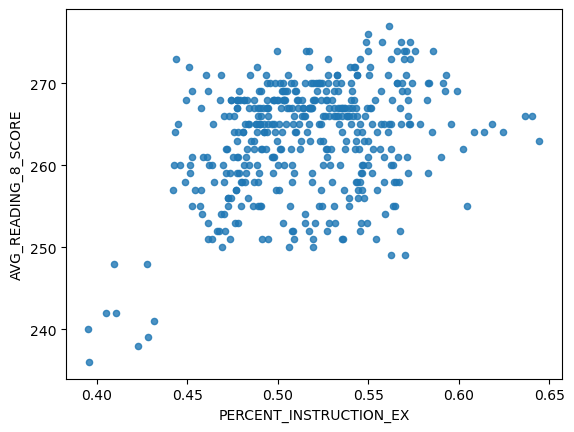

In [7]:
df.plot.scatter(x='PERCENT_INSTRUCTION_EX', y='AVG_READING_8_SCORE', alpha=0.8)

Scatterplot of Percent Instruction Expenditure by Average Reading Score.
The points are scattered all over the graph, so there appears to be no correlation between the two variables.


**Visualization 2**

Text(0, 0.5, 'Percent Instruction Expenditure')

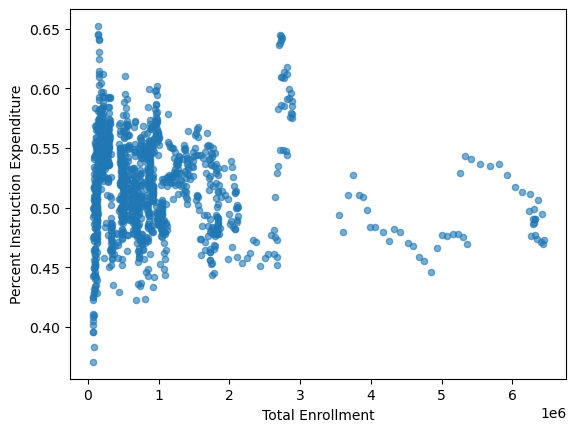

In [13]:
df.plot.scatter(x='GRADES_ALL_G', y='PERCENT_INSTRUCTION_EX', alpha=0.6)
plt.xlabel('Total Enrollment')
plt.ylabel('Percent Instruction Expenditure')

Scatterplot of Percent Instruction Expenditure by Total Enrollment.
The points are scattered throughout the graph, but there is a concentration on the left side, indicating that lower total enrollment of students allows for more variation in percent instruction expenditure. In this area of lower total enrollment, both the minimum and maximum percent instruction expenditure exists. There appears to be no other correlations between percent instruction expenditure and total enrollment.

<h2> Data Creation </h2>

_Use this space to create train/test data_

In [1]:
from sklearn.model_selection import train_test_split

In [20]:
# X =
x = df[['STATE_REVENUE','FEDERAL_REVENUE','LOCAL_REVENUE']].dropna()
# y = 
#y = df.loc[X.index]['AVG_READING_8_SCORE']
y = df.loc[x.index]['PERCENT_INSTRUCTION_EX']
y.fillna(y.median(), inplace=True)

In [21]:
# X_train, X_test, y_train, y_test = train_test_split(
#      X, y, test_size=, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.3, random_state=42)

<h2> Prediction </h2>

ML Models [Resource](https://medium.com/@vijaya.beeravalli/comparison-of-machine-learning-classification-models-for-credit-card-default-data-c3cf805c9a5a)

In [22]:
# import your sklearn class here
from sklearn.linear_model import LinearRegression

In [23]:
# create your model here
# model = 
model = LinearRegression()

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
y_pred = model.predict(X_test)

## Evaluation

Choose some metrics to evaluate the performance of your model, some of them are mentioned in the tutorial.

In [27]:
a = model.score(X_test, y_test)
b = np.mean(model.predict(X_test)-y_test)
c = np.mean(np.abs(model.predict(X_test)-y_test))
print(a,b,c)

0.02599106911952187 -0.0023661284664398935 0.031507912328884544


We have copied over the graphs that visualize the model's performance on the training and testing set. 

Change `col_name` and modify the call to `plt.ylabel()` to isolate how a single predictor affects the model.

Text(0.5, 1.0, 'Model Behavior On Training Set')

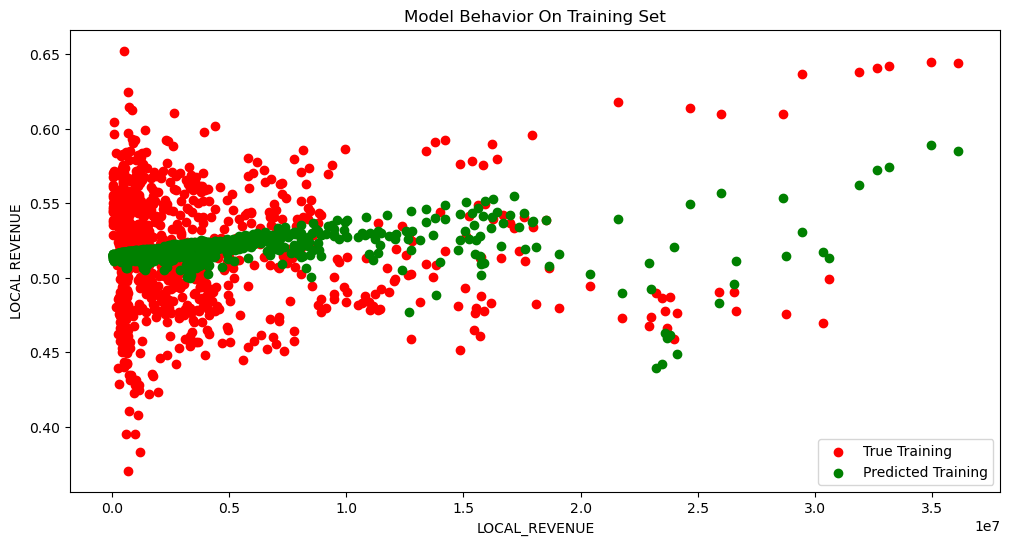

In [34]:
col_name = 'LOCAL_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_train[col_name], y_train, color = "red")
plt.scatter(X_train[col_name], model.predict(X_train), color = "green")

plt.legend(['True Training','Predicted Training'])
plt.xlabel(col_name)
plt.ylabel('LOCAL REVENUE')
plt.title("Model Behavior On Training Set")

Text(0.5, 1.0, 'Model Behavior on Testing Set')

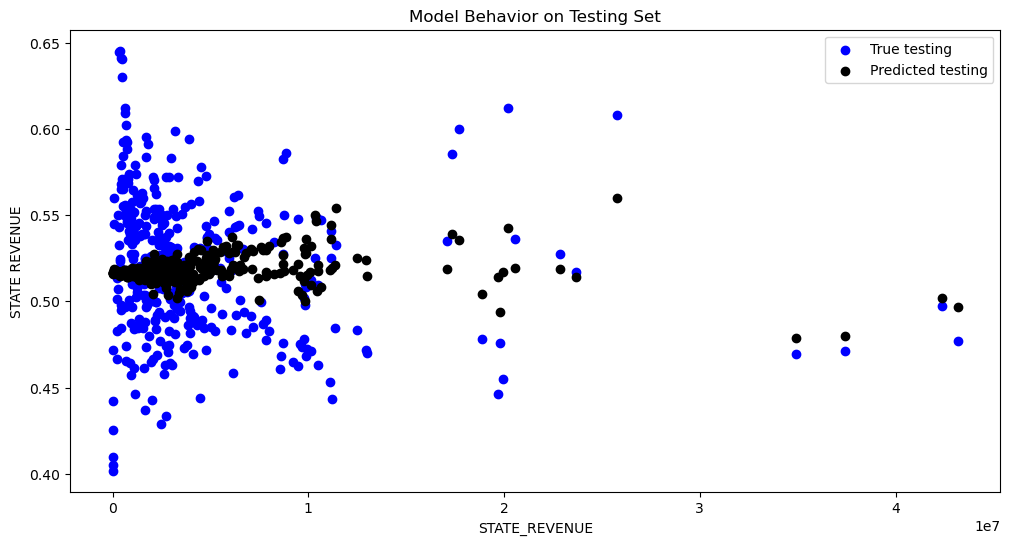

In [30]:
col_name = 'STATE_REVENUE'

f = plt.figure(figsize=(12,6))
plt.scatter(X_test[col_name], y_test, color = "blue")
plt.scatter(X_test[col_name], model.predict(X_test), color = "black")

plt.legend(['True testing','Predicted testing'])
plt.xlabel(col_name)
plt.ylabel('STATE REVENUE')
plt.title("Model Behavior on Testing Set")

<h2> Summary </h2>

This dataset analysis started with exploring the dataset, focusing on the role of instruction expenditure by state and across the country. To take a closer look at this factor, we modified the feature to look at instruction expenditure as a percentage of the total expenditure of each state. This feature was visualized against average reading score of eighth graders with the hypothesis that a higher percentage of instruction expenditure would lead to higher test scores and a positive correlation. The scatterplot did not support this claim and there appears to be no correlation between the two variables. Percentage expenditure was also looked at against total enrollment and no conclusive correlations could be found. Looking at our models, it seems our model does better on the training set, but is underfitting the testing set.